# Point Detectors

Some times detecting a specific object and its localisation in the image isn't necessary and we which only to describe the image with only few points of interests. We will need to find ways to detects points of interest...

There are 2 examples where finding points is necessary:

 - panoramic patching (to build a panoramic view from musltiple images and it could even allow us to build depth estimation for 3D reconstruction)

![panoramic matching](http://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15463-f10/www/proj4/www/gmethvin/pointsex1.jpg)

 - describe the scene with some points (because the objects are deformable and not in the same position of the image and we doesn't want to use a sliding window) for image classification (we will see it later...) or image retrieval.
 
![sift image matching](https://robwhess.github.io/opensift/images/sift_matches.jpg)
 
We will see how to describe thoses points of interest later. 

In this notebok we will look at the ___Harris Corner Detector___. 
There exists many others points detector like SIFT be wont cover them...

## Libraries

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from matplotlib import gridspec

from skimage import io
from skimage import color
from skimage import transform
from skimage import feature
from skimage import filters
from skimage import morphology


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Harris Corner Detector

This detector rely on the simple intuition that interesting points in the images are not where the signal doesn't move, also the most interesting points are the corners. 

This descriptor is built to find corners in the image and works pretty well as we can see bellow : 

![harris corner detector](http://opencv-python-tutroals.readthedocs.io/en/latest/_images/harris_result.jpg)

But how to define a corner ? A corner could be detected when the *x* and *y* gradients of the image are large (only one of both mean a line). But even if the idea is good, it's not sufficient. Indeed when the image is rotated in 45° the corner still exists but the *x* and *y* response is not large enought... This is solved with a simple trick with eigen values decomposition (see the maths on [wikipedia](https://en.wikipedia.org/wiki/Harris_Corner_Detector#cite_ref-harris_1-1)).

Let's see how to use this point detetor with sklearn and try to build something cool !

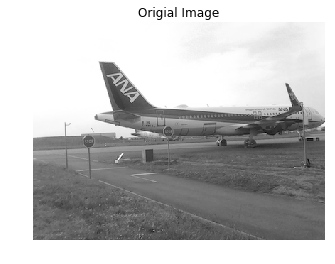

In [2]:
img = io.imread("imgs/avion.png", as_grey=True)

plt.title("Origial Image")
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.show()

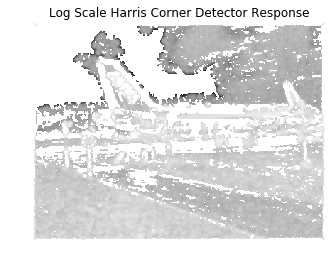

In [3]:
plt.title("Log Scale Harris Corner Detector Response")
plt.axis("off")
plt.imshow(np.log(feature.corner_harris(img)), cmap='gray')
plt.show()

In [4]:
coords = feature.corner_peaks(   #find coordinates of peaks
    feature.corner_harris(img),  #compute response
    min_distance=2               #only keep corners if not too close
)

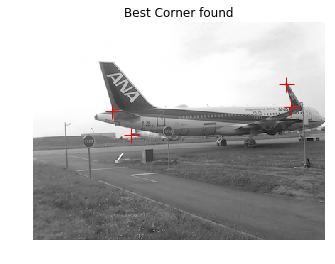

In [5]:
plt.title("Best Corner found")
plt.axis("off")
plt.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
plt.show()


## Application

An app which take a picture of an image and convert it into a nice pdf is not really complicated when you think about it.
Indeed, if you look closer, the main steps of this kind of app are :

- take a picture
- find the paper corners
- rotate the image

(few more preprocessing steps could be applied to make the app more robust to noise, but it's not the points here, we will just focus on the main steps...)

And finding the paper corners can be done in different ways:

- using the houg transform to find lines and find the corner (this is a more robust approach...)
- or find corners with a corner detector like harris and build the 4 most distants peaks which could be our corners !

Let's do it !

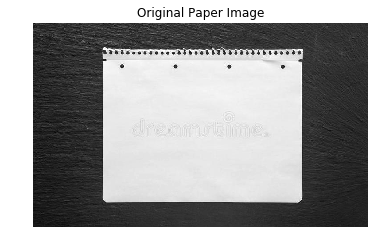

In [6]:
paper = io.imread("imgs/paper.jpg", as_grey=True)

plt.title("Original Paper Image")
plt.axis("off")
plt.imshow(paper, cmap='gray')
plt.show()

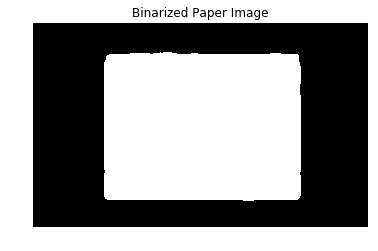

In [7]:
#first, let's binarize our image to help the corner detecor to not be influenced by the texture
#blurring help to reduce noise and wrong corner detection on the top...
binarized_paper = filters.gaussian(paper, sigma=6) > .7 

plt.title("Binarized Paper Image")
plt.axis("off")
plt.imshow(binarized_paper, cmap='gray')
plt.show()

In [8]:
#lets finds some corners
paper_coords = feature.corner_peaks(
    feature.corner_harris(binarized_paper),
    min_distance=5
)

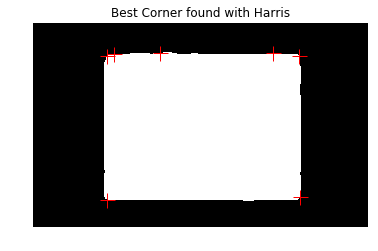

The Harris Corner didn't found the rounded corners... lets find the coordinates of the 4 most distant points...


In [9]:
plt.title("Best Corner found with Harris")
plt.axis("off")
plt.imshow(binarized_paper, interpolation='nearest', cmap=plt.cm.gray)
plt.plot(paper_coords[:, 1], paper_coords[:, 0], '+r', markersize=15)
plt.show()

print("The Harris Corner didn't found the rounded corners... lets find the coordinates of the 4 most distant points...")

In [10]:
min_0 = paper_coords[:, 0].min()
max_0 = paper_coords[:, 0].max()
min_1 = paper_coords[:, 1].min()
max_1 = paper_coords[:, 1].max()

corners = np.array([ #create the 4 most distant corners
    [min_0, min_1],
    [min_0, max_1],
    [max_0, min_1],
    [max_0, max_1]
])

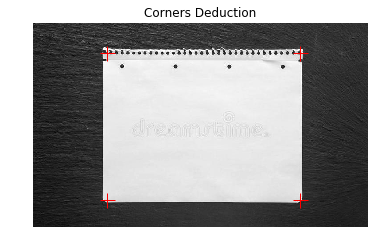

In [11]:
plt.title("Corners Deduction")
plt.axis("off")
plt.imshow(paper, interpolation='nearest', cmap=plt.cm.gray)
plt.plot(corners[:, 1], corners[:, 0], '+r', markersize=15)
plt.show()

**Exercice**: _if the background was ligher, wich kind of preprocessing step could you do ? (discuss about it...)_ 